In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
import os
os.getcwd()

'C:\\Users\\dofwj\\Downloads'

In [12]:
# Read the csv file into a pandas DataFramedate,value,datenumber
data = pd.read_csv('SP500_10yearchart.csv')
data

,date,value,datenumber
0,8/15/2007,1406.70,39309
1,8/16/2007,1411.27,39310
2,8/17/2007,1445.94,39311
3,8/20/2007,1445.55,39314
4,8/21/2007,1447.12,39315
...,...,...,...
3270,8/7/2020,3351.28,44050
3271,8/10/2020,3360.47,44053
3272,8/11/2020,3333.69,44054
3273,8/12/2020,3380.35,44055


In [77]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = data.datenumber.values.reshape(-1, 1)
y = data.value.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (3275, 1) (3275, 1)


array([[39309],
       [39310],
       [39311],
       ...,
       [44054],
       [44055],
       [44056]], dtype=int64)

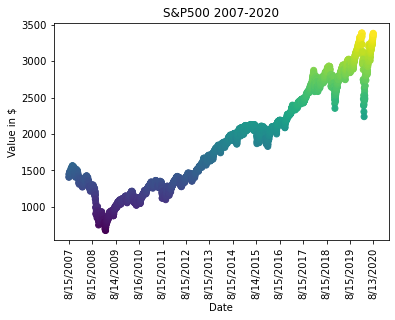

In [87]:
# Plot the data

### BEGIN SOLUTION
# x_axis = np.arange(39309, len(X))
# ticks = [39309, 39675, 40039, 40406, 40770, 41136, 41501, 41866, 42230, 42597, 42962, 43327, 43692, 44056]
# dates = ['8/15/2007', '8/15/2008', '8/14/2009', '8/16/2010', '8/15/2011', '8/15/2012', '8/15/2013', '8/15/2014', '8/14/2015', '8/15/2016', '8/15/2017', '8/15/2018', '8/15/2019', '8/13/2020']
# plt.title("S&P500 2007-2020")
# plt.xlabel("Date")
# plt.ylabel("Value in $")


# plt.xticks(rotation=90)
# plt.scatter (X, y, c=data.value,)
# plt.xticks(ticks, dates)
# plt.show()

### END SOLUTION

In [79]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [80]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression()

In [81]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[0.4610593]]
y-axis intercept:  [-17353.41582294]


In [82]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[39309]]
Max X Value: [[44056]]


In [83]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

In [111]:
text1 = "Mean Squared Error : 48886.185"
text2 = "R-squared : 0.8909"
text3 = "y-axis intercept: -17353.4158"
text4 = "Weight coefficients: 0.461"
texts = f"{text1}\n{text2}\n{text3}\n{text4}"

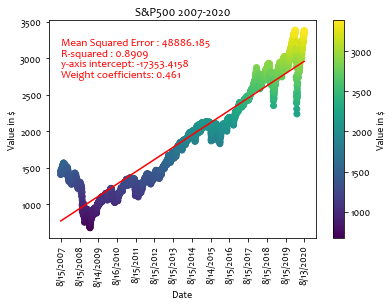

In [115]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION


x_axis = np.arange(39309, len(X))
ticks = [39309, 39675, 40039, 40406, 40770, 41136, 41501, 41866, 42230, 42597, 42962, 43327, 43692, 44056]
dates = ['8/15/2007', '8/15/2008', '8/14/2009', '8/16/2010', '8/15/2011', '8/15/2012', '8/15/2013', '8/15/2014', '8/14/2015', '8/15/2016', '8/15/2017', '8/15/2018', '8/15/2019', '8/13/2020']
plt.title("S&P500 2007-2020")
plt.xlabel("Date")
plt.ylabel("Value in $")

# plt.hlines(0, 0, x_lim, alpha=0.2)
# plt.xlim(0, x_lim)
# plt.ylim(-1.25, 1.25)
plt.xticks(rotation=90)
plt.scatter (X, y, c=data.value,)
plt.annotate(texts,(39309,2750),fontsize=11,color="red")
plt.xticks(ticks, dates)
clb = plt.colorbar()
clb.set_label("Value in $")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
#Calculate mse and r2 to test the reliability of the model
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 48886.18508886344
R-squared (R2 ): 0.8909468883284295


In [86]:
# Overall Score for the model
model.score(X, y)

0.8909468883284295